In [12]:
from sudoku import solve, sudoku_plot
import json

In [11]:
file_name1='sudoku_01.json'
file_name2='sudoku_02.json'

with open(file_name1, 'r') as jsonfile:
    sudoku1 = json.load(jsonfile)
    
with open(file_name2, 'r') as jsonfile:
    sudoku2 = json.load(jsonfile)

### Sudoku1 solution

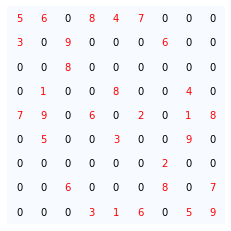

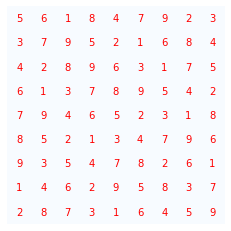

In [13]:
sudoku_plot(sudoku1)
sudoku_plot(solve(sudoku1))

### Sudoku2 solution

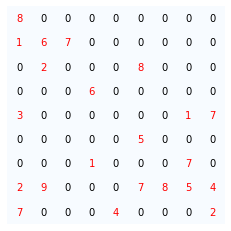

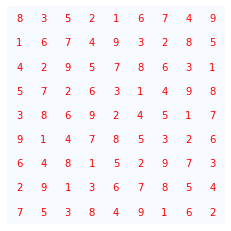

In [14]:
sudoku_plot(sudoku2)
sudoku_plot(solve(sudoku2))